In [111]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI5 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI5")
X_train = DKI5.index.values.reshape(-1, 1)
y_train = DKI5['PM10'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['PM10'].min()
max_par = DKI5['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.163
MSE: 0.027
MAE: 0.124
R-Squared: -0.617
       Tanggal       PM10
0   2022-11-30  51.111111
1   2022-12-01  51.111111
2   2022-12-02  51.111111
3   2022-12-03  51.111111
4   2022-12-04  50.888889
5   2022-12-05  50.888889
6   2022-12-06  50.888889
7   2022-12-07  50.888889
8   2022-12-08  50.888889
9   2022-12-09  50.888889
10  2022-12-10  50.888889
11  2022-12-11  50.888889
12  2022-12-12  50.888889
13  2022-12-13  50.888889
14  2022-12-14  50.888889
15  2022-12-15  50.888889
16  2022-12-16  50.888889
17  2022-12-17  50.888889
18  2022-12-18  50.888889
19  2022-12-19  50.888889
20  2022-12-20  50.888889
21  2022-12-21  50.888889
22  2022-12-22  50.888889
23  2022-12-23  50.888889
24  2022-12-24  50.888889
25  2022-12-25  50.888889
26  2022-12-26  50.888889
27  2022-12-27  50.888889
28  2022-12-28  50.888889
29  2022-12-29  50.888889


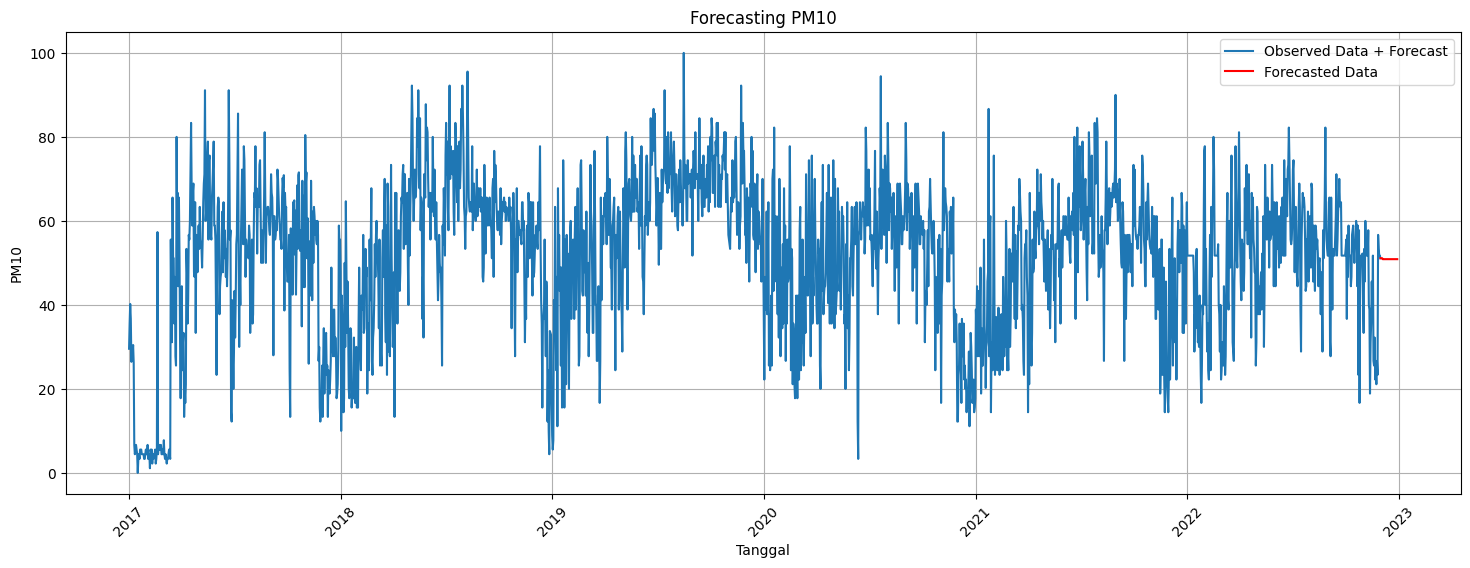

In [113]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['PM10'].min()
max_par = DKI5['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.164
MSE: 0.027
MAE: 0.126
R-Squared: -0.636
       Tanggal       PM10
0   2022-11-30  42.222222
1   2022-12-01  40.000000
2   2022-12-02  40.444444
3   2022-12-03  44.222222
4   2022-12-04  50.000000
5   2022-12-05  52.444444
6   2022-12-06  52.444444
7   2022-12-07  52.222222
8   2022-12-08  51.737808
9   2022-12-09  50.888889
10  2022-12-10  50.888889
11  2022-12-11  50.888889
12  2022-12-12  50.888889
13  2022-12-13  50.888889
14  2022-12-14  50.888889
15  2022-12-15  50.888889
16  2022-12-16  50.888889
17  2022-12-17  50.888889
18  2022-12-18  50.888889
19  2022-12-19  50.888889
20  2022-12-20  50.888889
21  2022-12-21  50.888889
22  2022-12-22  50.888889
23  2022-12-23  50.888889
24  2022-12-24  50.888889
25  2022-12-25  50.888889
26  2022-12-26  50.888889
27  2022-12-27  50.888889
28  2022-12-28  50.888889
29  2022-12-29  50.888889


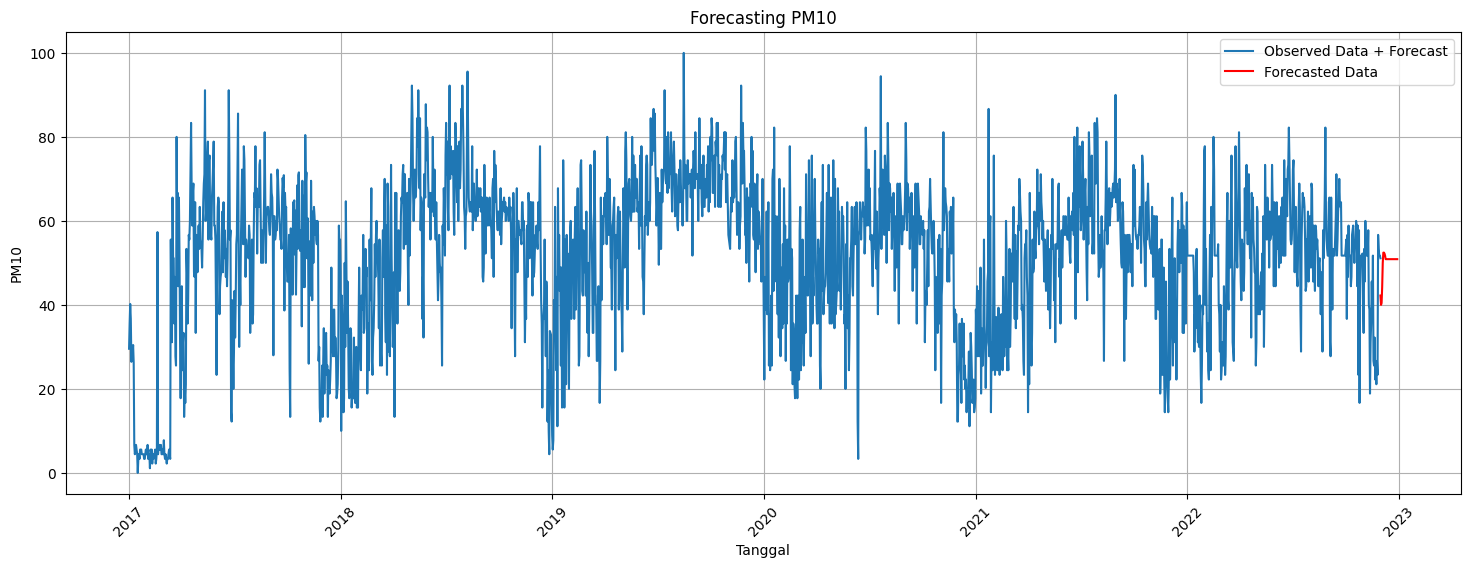

In [115]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['PM10'].min()
max_par = DKI5['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.261
MSE: 0.068
MAE: 0.227
R-Squared: -3.135
       Tanggal       PM10
0   2022-11-30  63.333333
1   2022-12-01  63.333333
2   2022-12-02  63.333333
3   2022-12-03  63.333333
4   2022-12-04  63.333333
5   2022-12-05  63.333333
6   2022-12-06  63.555556
7   2022-12-07  63.555556
8   2022-12-08  63.555556
9   2022-12-09  63.555556
10  2022-12-10  63.555556
11  2022-12-11  63.555556
12  2022-12-12  63.555556
13  2022-12-13  63.555556
14  2022-12-14  63.555556
15  2022-12-15  63.555556
16  2022-12-16  63.555556
17  2022-12-17  63.555556
18  2022-12-18  63.555556
19  2022-12-19  63.555556
20  2022-12-20  63.555556
21  2022-12-21  63.555556
22  2022-12-22  63.555556
23  2022-12-23  63.555556
24  2022-12-24  63.555556
25  2022-12-25  63.555556
26  2022-12-26  63.555556
27  2022-12-27  63.555556
28  2022-12-28  63.555556
29  2022-12-29  63.555556


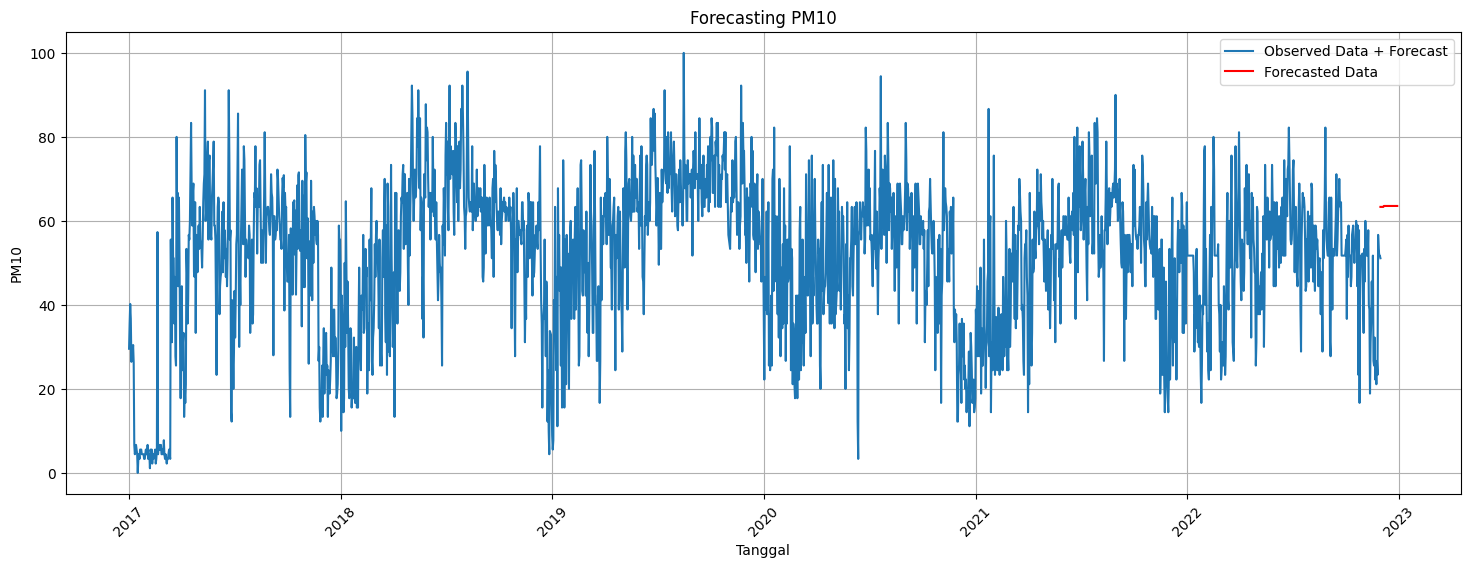

In [117]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['PM10'].min()
max_par = DKI5['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.202
MSE: 0.041
MAE: 0.160
R-Squared: -1.484
       Tanggal       PM10
0   2022-11-30  56.444444
1   2022-12-01  56.444444
2   2022-12-02  56.444444
3   2022-12-03  56.444444
4   2022-12-04  56.444444
5   2022-12-05  56.444444
6   2022-12-06  56.444444
7   2022-12-07  56.444444
8   2022-12-08  56.444444
9   2022-12-09  56.444444
10  2022-12-10  56.444444
11  2022-12-11  56.444444
12  2022-12-12  56.444444
13  2022-12-13  56.444444
14  2022-12-14  56.444444
15  2022-12-15  56.444444
16  2022-12-16  56.444444
17  2022-12-17  56.444444
18  2022-12-18  56.444444
19  2022-12-19  56.444444
20  2022-12-20  56.444444
21  2022-12-21  56.444444
22  2022-12-22  56.444444
23  2022-12-23  56.444444
24  2022-12-24  56.444444
25  2022-12-25  56.444444
26  2022-12-26  56.444444
27  2022-12-27  56.444444
28  2022-12-28  56.444444
29  2022-12-29  56.444444


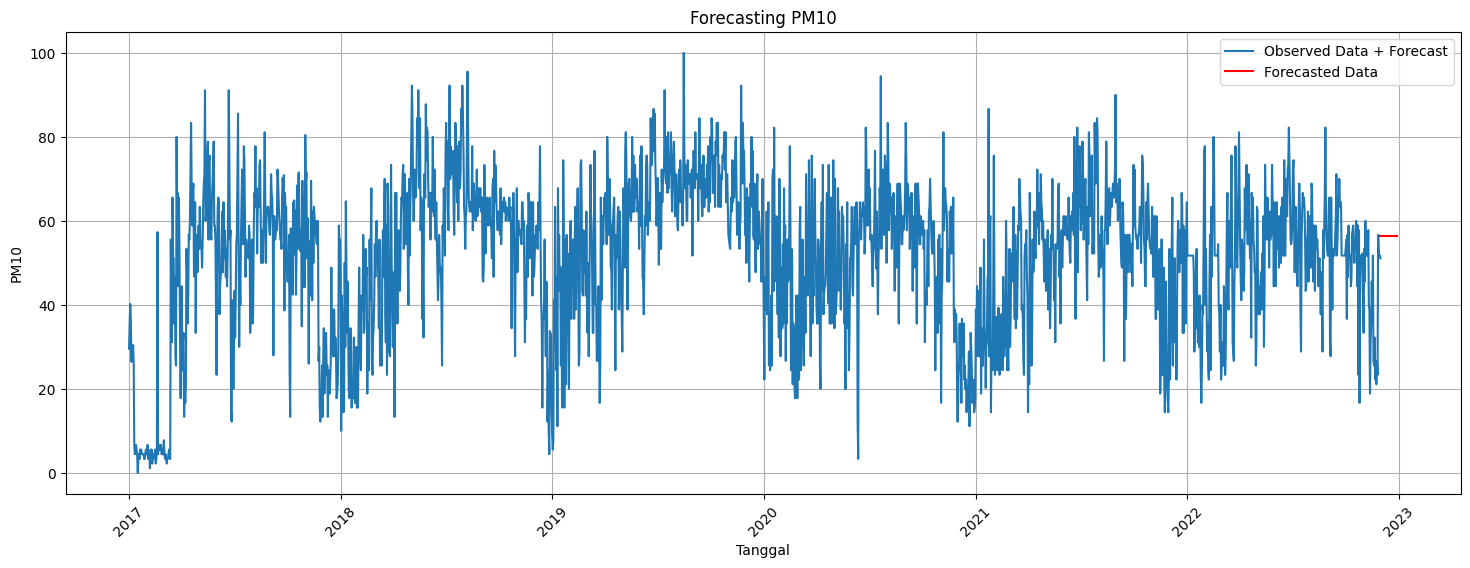

In [119]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['PM10'].min()
max_par = DKI5['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.199
MSE: 0.039
MAE: 0.156
R-Squared: -1.400
       Tanggal  PM10
0   2022-11-30  56.0
1   2022-12-01  56.0
2   2022-12-02  56.0
3   2022-12-03  56.0
4   2022-12-04  56.0
5   2022-12-05  56.0
6   2022-12-06  56.0
7   2022-12-07  56.0
8   2022-12-08  56.0
9   2022-12-09  56.0
10  2022-12-10  56.0
11  2022-12-11  56.0
12  2022-12-12  56.0
13  2022-12-13  56.0
14  2022-12-14  56.0
15  2022-12-15  56.0
16  2022-12-16  56.0
17  2022-12-17  56.0
18  2022-12-18  56.0
19  2022-12-19  56.0
20  2022-12-20  56.0
21  2022-12-21  56.0
22  2022-12-22  56.0
23  2022-12-23  56.0
24  2022-12-24  56.0
25  2022-12-25  56.0
26  2022-12-26  56.0
27  2022-12-27  56.0
28  2022-12-28  56.0
29  2022-12-29  56.0


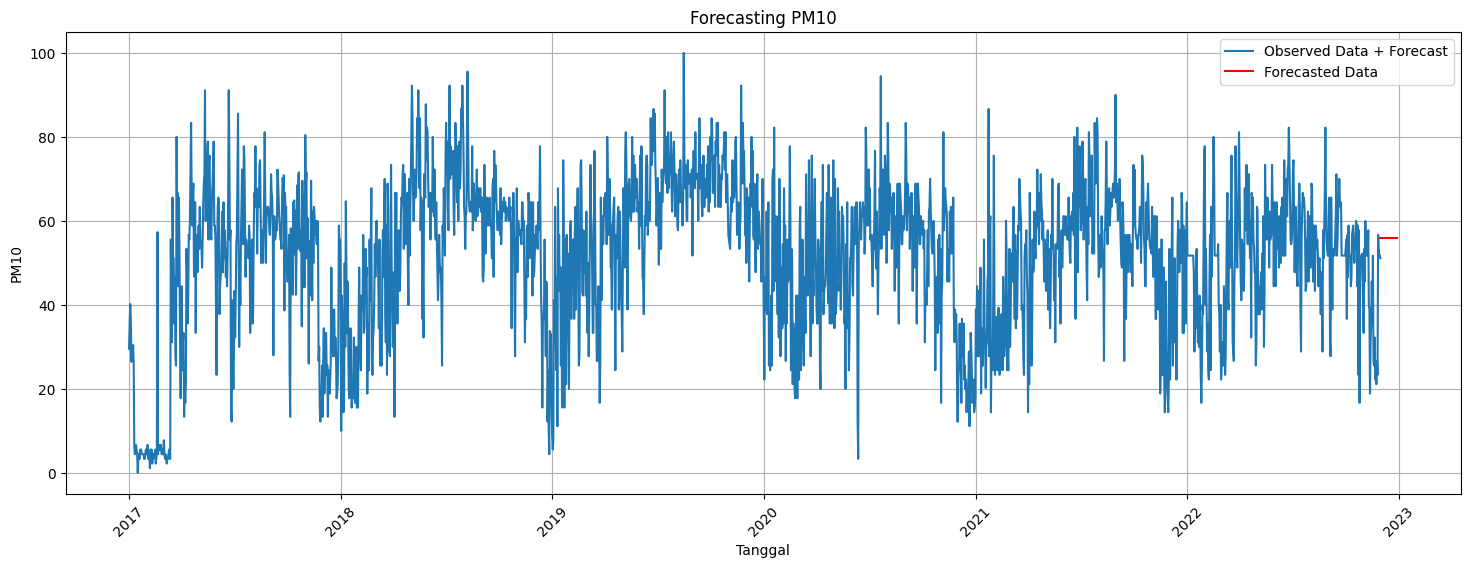

In [121]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
